In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df= pd.read_csv("A:\Machine Learning\Datasets\Kepler dataset.csv",skiprows=8)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\oshah\AppData\Local\Temp\ipykernel_5908\2376117064.py:1: SyntaxWarning: invalid escape sequence '\M'
  df= pd.read_csv("A:\Machine Learning\Datasets\Kepler dataset.csv",skiprows=8)


,rowid,kepid,koi_name,kepler_name,pl_name
0,1,11446443,K00001.01,Kepler-1 b,TrES-2 b
1,2,11904151,K00072.01,Kepler-10 b,Kepler-10 b
2,3,11904151,K00072.02,Kepler-10 c,Kepler-10 c
3,4,11904151,NaN,Kepler-10 d,Kepler-10 d
4,5,6521045,K00041.02,Kepler-100 b,Kepler-100 b
...,...,...,...,...,...
2811,2812,4035640,K01881.01,Kepler-995 b,Kepler-995 b
2812,2813,6205228,K01882.01,Kepler-996 b,Kepler-996 b
2813,2814,11758544,K01883.01,Kepler-997 b,Kepler-997 b
2814,2815,11413812,K01885.01,Kepler-998 b,Kepler-998 b


In [5]:
#Replacing missing 'koi_name' values with 'NA'
df_cleaned = df.fillna({'koi_name': 'NA'})

In [6]:
#Printing the information about the cleaned DataFrame and the first 5 rows to show the result
print("DataFrame after filling missing 'koi_name' values with 'NA':")
print(df_cleaned.info())
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df_cleaned.head())

DataFrame after filling missing 'koi_name' values with 'NA':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rowid        2816 non-null   int64 
 1   kepid        2816 non-null   int64 
 2   koi_name     2816 non-null   object
 3   kepler_name  2816 non-null   object
 4   pl_name      2816 non-null   object
dtypes: int64(2), object(3)
memory usage: 110.1+ KB
None

First 5 rows of the cleaned DataFrame:
   rowid     kepid   koi_name   kepler_name       pl_name
0      1  11446443  K00001.01    Kepler-1 b      TrES-2 b
1      2  11904151  K00072.01   Kepler-10 b   Kepler-10 b
2      3  11904151  K00072.02   Kepler-10 c   Kepler-10 c
3      4  11904151         NA   Kepler-10 d   Kepler-10 d
4      5   6521045  K00041.02  Kepler-100 b  Kepler-100 b


In [7]:
df.isnull().sum()

rowid           0
kepid           0
koi_name       70
kepler_name     0
pl_name         0
dtype: int64

In [8]:
df.notnull().sum()

rowid          2816
kepid          2816
koi_name       2746
kepler_name    2816
pl_name        2816
dtype: int64

In [9]:
df.describe()

,rowid,kepid
count,2816.000000,2.816000e+03
mean,1408.500000,8.031521e+06
std,813.053504,2.609008e+06
min,1.000000,7.574500e+05
25%,704.750000,6.022236e+06
50%,1408.500000,8.279441e+06
75%,2112.250000,1.009571e+07
max,2816.000000,1.283487e+07


In [10]:
print(df.head())
#Displaying the column information for checking any missing values or incorrect data types
print(df.info())
#Counting the number of unique confirmed planets by counting the unique non-missing values in the 'pl_name' column
confirmed_planets_count = df['pl_name'].nunique()
#Printing the final count
print(f"The total number of unique confirmed planets is: {confirmed_planets_count}")


   rowid     kepid   koi_name   kepler_name       pl_name
0      1  11446443  K00001.01    Kepler-1 b      TrES-2 b
1      2  11904151  K00072.01   Kepler-10 b   Kepler-10 b
2      3  11904151  K00072.02   Kepler-10 c   Kepler-10 c
3      4  11904151        NaN   Kepler-10 d   Kepler-10 d
4      5   6521045  K00041.02  Kepler-100 b  Kepler-100 b
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rowid        2816 non-null   int64 
 1   kepid        2816 non-null   int64 
 2   koi_name     2746 non-null   object
 3   kepler_name  2816 non-null   object
 4   pl_name      2816 non-null   object
dtypes: int64(2), object(3)
memory usage: 110.1+ KB
None
The total number of unique confirmed planets is: 2816


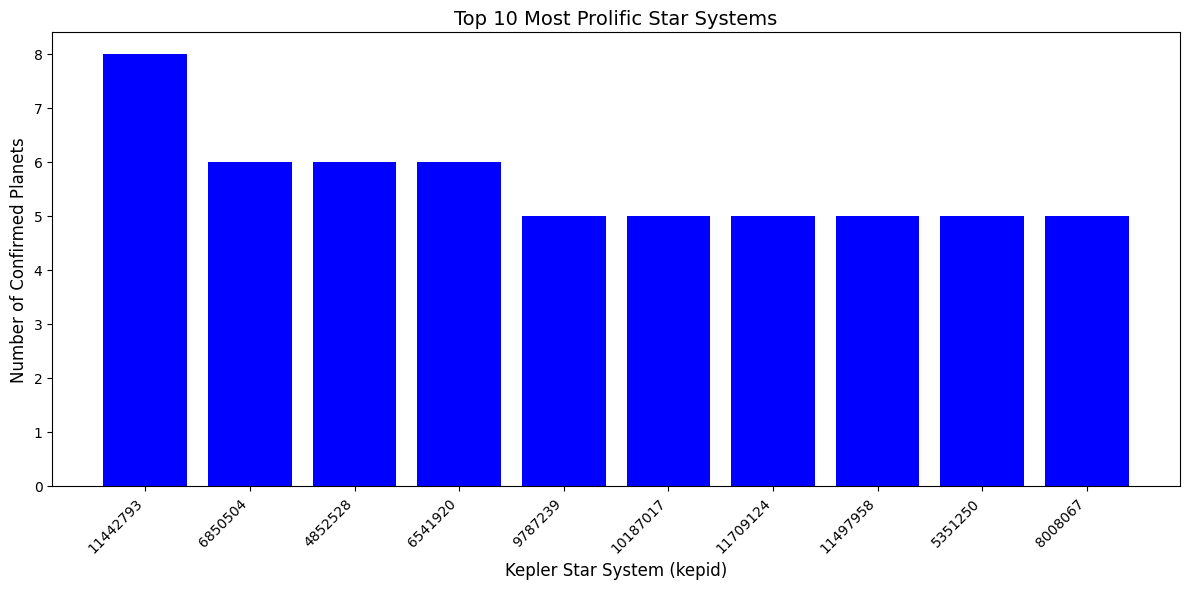

Top 10 Most Prolific Star Systems:
      kepid  planet_count
0  11442793             8
1   6850504             6
2   4852528             6
3   6541920             6
4   9787239             5
5  10187017             5
6  11709124             5
7  11497958             5
8   5351250             5
9   8008067             5


In [11]:
#Grouping by 'kepid' and counting the number of unique planets in each system
prolific_systems = df.groupby('kepid')['pl_name'].nunique()
#Sorting the systems in descending order and selecting the top 10
top_10_systems = prolific_systems.sort_values(ascending=False).head(10)
#Creating a DataFrame for plotting
df_top_10 = top_10_systems.reset_index()
df_top_10.columns = ['kepid', 'planet_count']
#Creating the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_top_10['kepid'].astype(str), df_top_10['planet_count'], color='blue')
plt.xlabel('Kepler Star System (kepid)', fontsize=12)
plt.ylabel('Number of Confirmed Planets', fontsize=12)
plt.title('Top 10 Most Prolific Star Systems', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Printing the top 10 systems
print("Top 10 Most Prolific Star Systems:")
print(df_top_10)

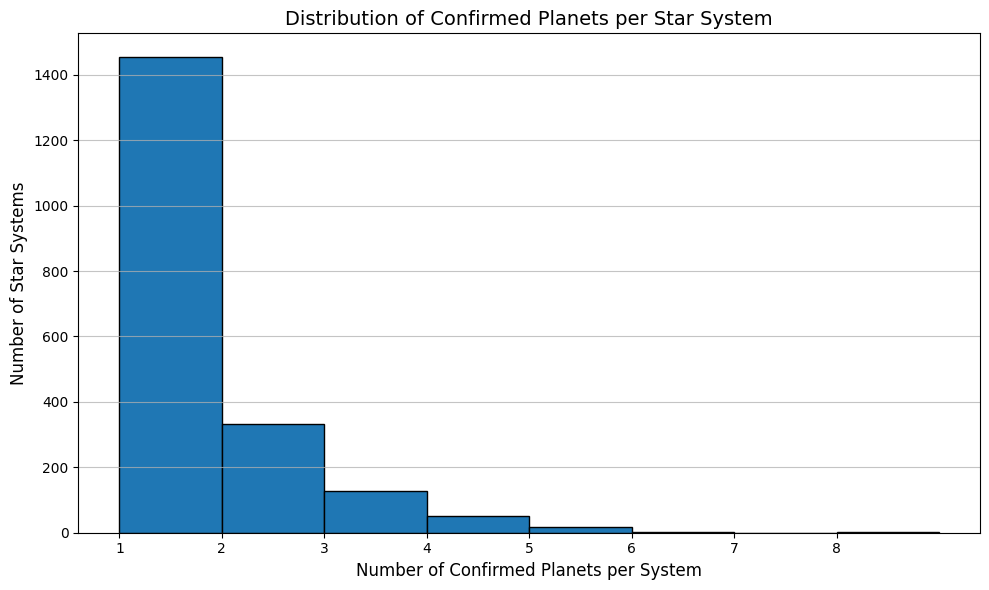

Total number of star systems: 1985
Maximum number of planets in a single system: 8
Number of systems with only one planet: 1454


In [12]:
#Group by 'kepid' and count the number of unique planets in each system
planets_per_system = df.groupby('kepid')['pl_name'].nunique()

#Creating a histogram to visualize the distribution of planets per system
plt.figure(figsize=(10, 6))
plt.hist(planets_per_system, bins=range(1, planets_per_system.max() + 2), edgecolor='black')
plt.xlabel('Number of Confirmed Planets per System', fontsize=12)
plt.ylabel('Number of Star Systems', fontsize=12)
plt.title('Distribution of Confirmed Planets per Star System', fontsize=14)
plt.xticks(range(1, planets_per_system.max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#Printing some basic stats to provide more inrformation about the dataset
print(f"Total number of star systems: {len(planets_per_system)}")
print(f"Maximum number of planets in a single system: {planets_per_system.max()}")
print(f"Number of systems with only one planet: {len(planets_per_system[planets_per_system == 1])}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rowid        2816 non-null   int64 
 1   kepid        2816 non-null   int64 
 2   koi_name     2746 non-null   object
 3   kepler_name  2816 non-null   object
 4   pl_name      2816 non-null   object
dtypes: int64(2), object(3)
memory usage: 110.1+ KB
None


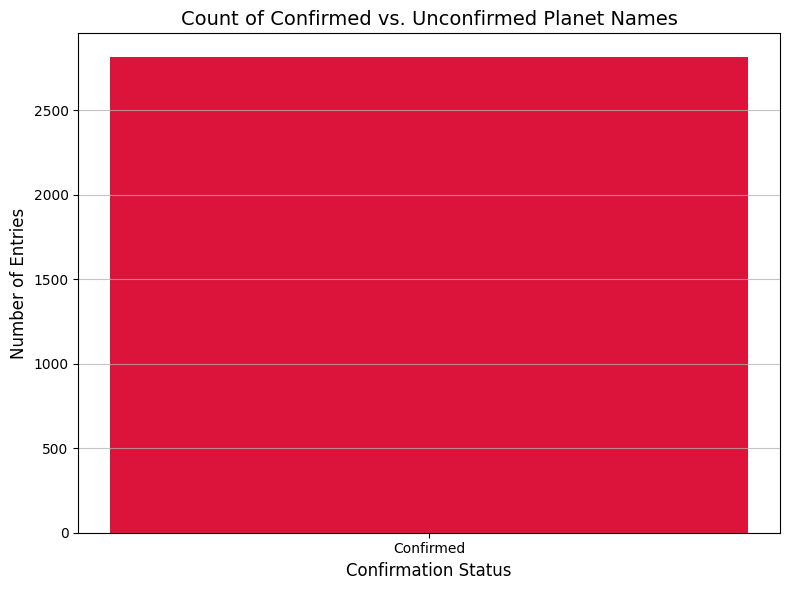

Number of entries with a confirmed planet name (pl_name): 2816
Number of entries with a Kepler name (kepler_name) but no confirmed name: 0


In [13]:
#Counting entries with a confirmed planet name ('pl_name')
confirmed_count = df['pl_name'].count()
#Counting entries with a Kepler name but no confirmed name.
unconfirmed_count = df['pl_name'].isnull().sum()
#There are no missing values in `pl_name`. This means all `kepler_name` entrieshave a corresponding `pl_name`. Let's re-verify this.
print(df.info())
#Based on the data, the unconfirmed count is 0. This makes a bar chart with only one bar.
#Preparing data for plotting. Since unconfirmed is 0.
data = pd.DataFrame({
    'status': ['Confirmed'],
    'count': [confirmed_count]
})

#Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(data['status'], data['count'], color=['crimson'])
plt.xlabel('Confirmation Status', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.title('Count of Confirmed vs. Unconfirmed Planet Names', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

#Output of the counts
print(f"Number of entries with a confirmed planet name (pl_name): {confirmed_count}")
print(f"Number of entries with a Kepler name (kepler_name) but no confirmed name: {unconfirmed_count}")

Summary
1. The Total number of unique confirmed planets is: 2816
2. The Top 10 Most Prolific Star Systems are displayed in the bar chart.
3. Total number of star systems: 1985.
4. Maximum number of planets in a single system: 8.
5. Maximum number of systems with only one planet: 1454.
6. Number of entries with a Kepler name (kepler_name) but no confirmed name: 0.